In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing

In [157]:
#Q-1 Crime data
df=pd.read_csv("G:\CHETAN\Assignments\Clustering\crime_data.csv")
df.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [158]:
df=df.rename(columns={"Unnamed: 0": "City"})
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [160]:
df1=df.copy()
df1.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [161]:
df1=df1.drop(['City'],axis=1)

<Figure size 1296x864 with 0 Axes>

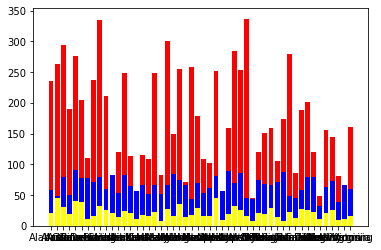

<Figure size 1296x864 with 0 Axes>

In [162]:
ax = plt.subplot()
ax.bar(df["City"], df["Murder"],color='pink')
ax.bar(df["City"], df["Assault"], color="red")
ax.bar(df["City"], df["UrbanPop"], color="blue")
ax.bar(df["City"], df["Rape"], color="yellow")
plt.figure(figsize=(18,12))

In [163]:
df1_norm = preprocessing.scale(df1)

G:\CHETAN\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


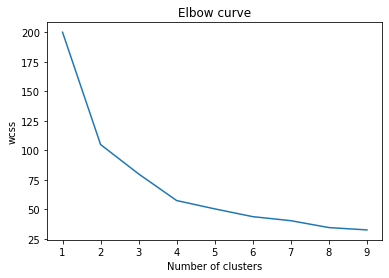

In [164]:
wcss=[]
for i in range(1,10):
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=0).fit(df1_norm)
    wcss.append(kmean.inertia_)
plt.plot(range(1,10),wcss)
plt.title('Elbow curve')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [165]:
#the curve level off at k = 5

In [166]:
model1=KMeans(n_clusters=5).fit(df1_norm)
model1.labels_

array([3, 1, 1, 0, 1, 1, 2, 0, 1, 3, 2, 4, 1, 0, 4, 0, 0, 3, 4, 1, 2, 1,
       4, 3, 1, 0, 0, 1, 4, 2, 1, 1, 3, 4, 2, 0, 0, 2, 2, 3, 4, 3, 1, 2,
       4, 0, 2, 4, 4, 0])

In [167]:
cl=pd.DataFrame(model1.labels_,columns=['Cluster'])
pd.concat([df,cl],axis=1).head()

,City,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

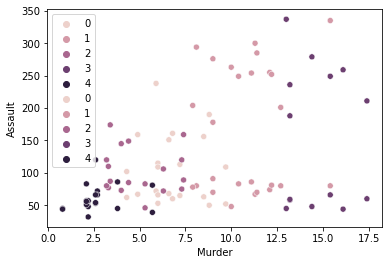

In [168]:
import seaborn as sns
sns.scatterplot(x=df['Murder'],y=df['Assault'],hue=model1.labels_)
sns.scatterplot(x=df['Murder'],y=df['UrbanPop'],hue=model1.labels_)

<AxesSubplot:xlabel='Murder', ylabel='UrbanPop'>

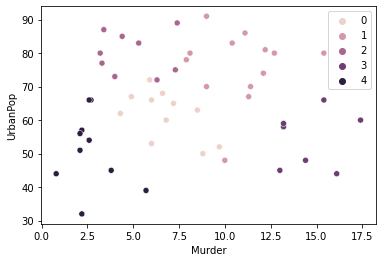

In [169]:
sns.scatterplot(x=df['Murder'],y=df['UrbanPop'],hue=model1.labels_)

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

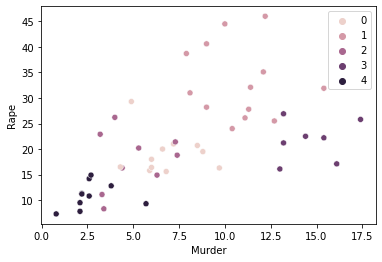

In [170]:
sns.scatterplot(x=df['Murder'],y=df['Rape'],hue=model1.labels_)

In [171]:
from sklearn.cluster import DBSCAN
dbscan= DBSCAN(eps=2,min_samples=4).fit(df1_norm)
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [172]:
cl=pd.DataFrame(dbscan.labels_,columns=['dbscan'])
df2=pd.concat([df,cl],axis=1)

In [173]:
df2.drop(df2.loc[df2['dbscan']==-1].index, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      49 non-null     object 
 1   Murder    49 non-null     float64
 2   Assault   49 non-null     int64  
 3   UrbanPop  49 non-null     int64  
 4   Rape      49 non-null     float64
 5   dbscan    49 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 2.7+ KB


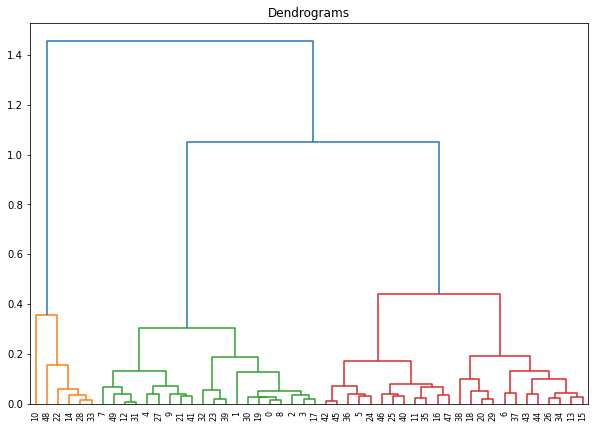

In [174]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df1)
data_scaled = pd.DataFrame(data_scaled, columns=df1.columns)
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

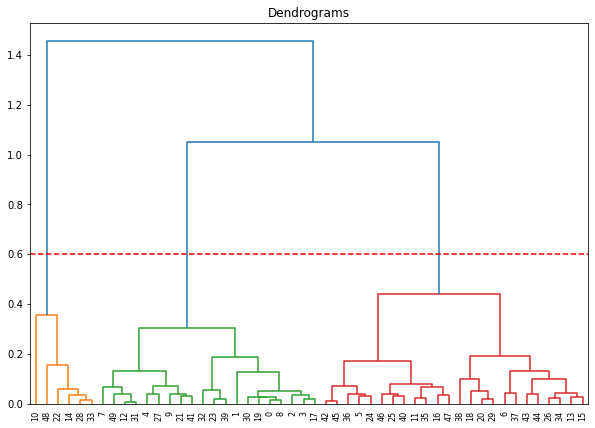

In [175]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.6, color='r', linestyle='--')

In [176]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2], dtype=int64)

In [177]:
cl=pd.DataFrame(cluster.fit_predict(data_scaled),columns=['Cluster'])
df_hie=pd.concat([df,cl],axis=1)
df_hie.head()

,City,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,2


In [178]:
#Q-2 EastWestAirlines
data=pd.read_csv("G:\CHETAN\Assignments\Clustering\EastWestAirlinescsv.csv")
data.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [179]:
array=data.values
std=StandardScaler().fit_transform(data)
std

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

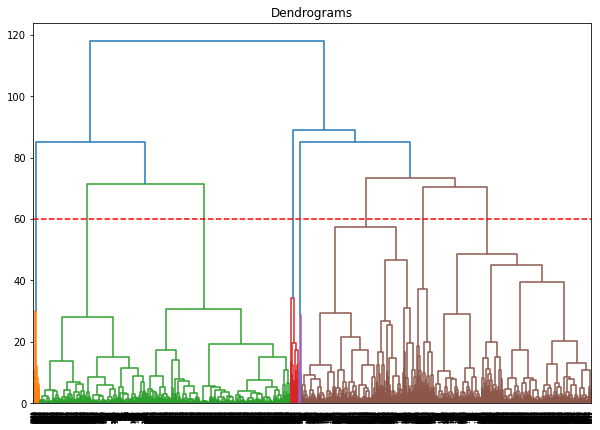

In [180]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(std, method='ward'))
plt.axhline(y=60, color='r', linestyle='--')

In [181]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
cluster.fit_predict(std)
cl=pd.DataFrame(cluster.fit_predict(std),columns=['Cluster'])

In [182]:
pd.concat([data,cl], axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [183]:
dbscan= DBSCAN(eps=2,min_samples=4).fit(std)
print(dbscan.labels_)

[0 0 0 ... 1 0 0]


In [188]:
cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])
pd.concat([data,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
